In [1]:
from google.colab import drive
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
vehicle_path = '/content/drive/MyDrive/Capstone Project/Maintnet DataSets/vehicle.zip'
extract_path = '/content/vehicle'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(vehicle_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [13]:
grammar_path = '/content/vehicle/Vehicle_Grammar_Dataset.csv'
termbank_dataset = '/content/vehicle/Vehicle_TermBank_Dataset.csv'
abbrevs_path = '/content/vehicle/words_and_abbreviations_with_column.xlsx'

In [14]:
grammar_df = pd.read_csv(grammar_path)
termbank_df = pd.read_csv(termbank_dataset)
abbrevs_df = pd.read_excel(abbrevs_path)

In [15]:
print(grammar_df.shape, termbank_df.shape, abbrevs_df.shape)
abbrevs_df.head()

(57, 6) (100, 2) (59, 3)


,Word,Description,abbreviations_4_letter
0,cylinder,repair,CYLI
1,gasket,repair,GASK
2,thrust,repair,THRU
3,inoperable,repair,INOP
4,hydraulic,repair,HYDR


In [16]:
termbank_df.head()

,Word,Example
0,baffle,cylinder baffle #4 intake leaking.
1,left,#2 & 4 left cylinder rocker cover gaskets leak...
2,right,induction right tube hose clamps loose (all cy...
3,cylinder,cylinder rocker box cover screws are loose.
4,gasket,#1 intake gasket leaking.


In [17]:
grammar_df.head()

,Word,Description,Compound,Lemma,Stem,Part of Speech (POS)
0,engine,aircraft engine,engine-holder,engine,engin,NN
1,cylinder,cylinder baffle,-,cylinder,cylinder,NN
2,gasket,rocker cover gasket,-,gasket,gasket,NN
3,thrust,aircraft engine thrust,-,thrust,thrust,NN
4,inoperable,engine inoperable,-,inoperate,inoperabl,ADJ


##**Data Merging**



In [20]:
for df in [
    grammar_df,
    termbank_df,
    abbrevs_df
]:
    df.rename(columns={'Word': 'word'}, inplace=True)

vehicle_merged_df = abbrevs_df.merge(
    grammar_df, on='word', how='inner', suffixes=('_abbr', '_grammar')
).merge(
    termbank_df, on='word', how='inner', suffixes=('_grammar', '_termbank'))
print("Final merged shape:", vehicle_merged_df.shape)
vehicle_merged_df.head()


Final merged shape: (46, 9)


,word,Description_abbr,abbreviations_4_letter,Description_grammar,Compound,Lemma,Stem,Part of Speech (POS),Example
0,cylinder,repair,CYLI,cylinder baffle,-,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
1,cylinder,repair,CYLI,left or right aircraft cylinders,cylinder head temperature,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
2,gasket,repair,GASK,rocker cover gasket,-,gasket,gasket,NN,#1 intake gasket leaking.
3,thrust,repair,THRU,aircraft engine thrust,-,thrust,thrust,NN,on start up engine began to run rough. ran en...
4,inoperable,repair,INOP,engine inoperable,-,inoperate,inoperabl,ADJ,engine run rough flight inoperable.


In [21]:
vehicle_merged_df.to_csv('/content/drive/MyDrive/Capstone Project/vehicle_merged_dataset.csv', index=False)

##**EDA and Cleaning**

In [22]:
missing_counts = vehicle_merged_df.isnull().sum()
print(missing_counts)

word                      0
Description_abbr          0
abbreviations_4_letter    0
Description_grammar       0
Compound                  0
Lemma                     0
Stem                      0
Part of Speech (POS)      0
Example                   0
dtype: int64


In [24]:
vehicle_merged_df.head()

,word,Description_abbr,abbreviations_4_letter,Description_grammar,Lemma,Stem,Part of Speech (POS),Example
0,cylinder,repair,CYLI,cylinder baffle,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
1,cylinder,repair,CYLI,left or right aircraft cylinders,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
2,gasket,repair,GASK,rocker cover gasket,gasket,gasket,NN,#1 intake gasket leaking.
3,thrust,repair,THRU,aircraft engine thrust,thrust,thrust,NN,on start up engine began to run rough. ran en...
4,inoperable,repair,INOP,engine inoperable,inoperate,inoperabl,ADJ,engine run rough flight inoperable.


In [25]:
duplicates = vehicle_merged_df.duplicated(subset=['word']).sum()
print(duplicates)

10


In [26]:
vehicle_merged_df = vehicle_merged_df.drop_duplicates(keep='first')

In [35]:
vehicle_merged_df.head()

,word,Description_abbr,abbreviations_4_letter,Description_grammar,Lemma,Stem,Part of Speech (POS),Example
0,cylinder,repair,CYLI,cylinder baffle,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
1,cylinder,repair,CYLI,left or right aircraft cylinders,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
2,gasket,repair,GASK,rocker cover gasket,gasket,gasket,NN,#1 intake gasket leaking.
3,thrust,repair,THRU,aircraft engine thrust,thrust,thrust,NN,on start up engine began to run rough. ran en...
4,inoperable,repair,INOP,engine inoperable,inoperate,inoperabl,ADJ,engine run rough flight inoperable.


In [34]:
vehicle_merged_df = vehicle_merged_df.drop('Compound', axis=1, inplace=True)

KeyError: "['Compound'] not found in axis"

In [36]:
vehicle_merged_df.to_csv('/content/drive/MyDrive/Capstone Project/aviation_merged_dataset.csv', index=False)

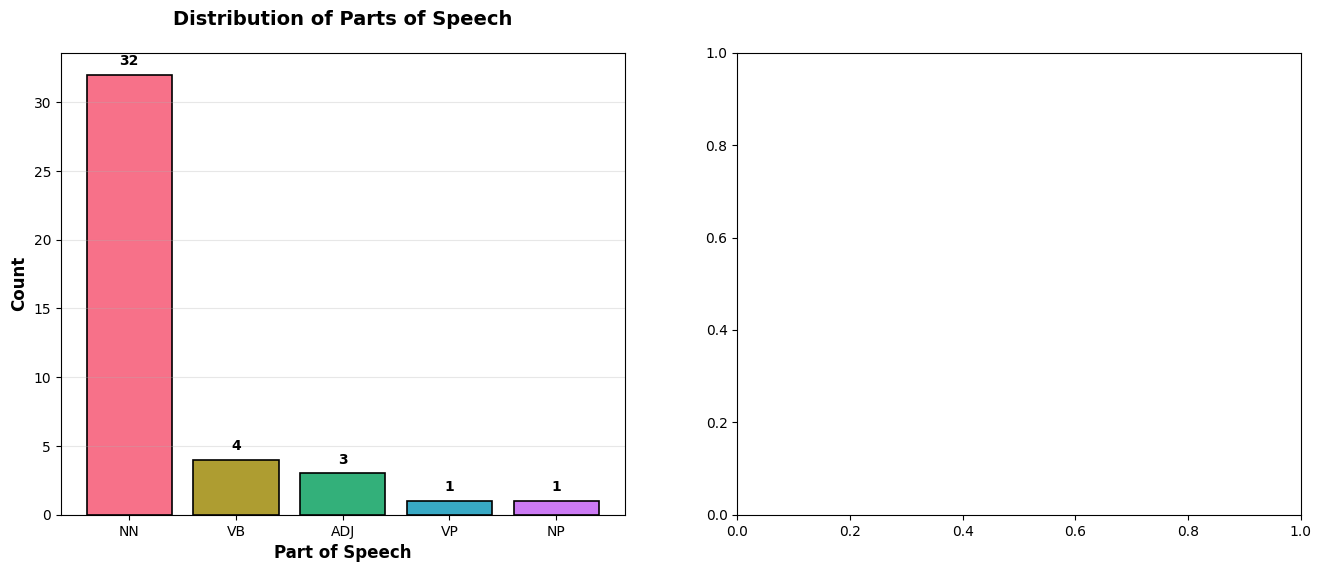

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
pos_counts = vehicle_merged_df['Part of Speech (POS)'].value_counts()
colors = sns.color_palette("husl", len(pos_counts))
axes[0].bar(pos_counts.index, pos_counts.values, color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Part of Speech', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Parts of Speech', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(pos_counts.items()):
    axes[0].text(i, val + 0.5, str(val), ha='center', va='bottom', fontweight='bold')

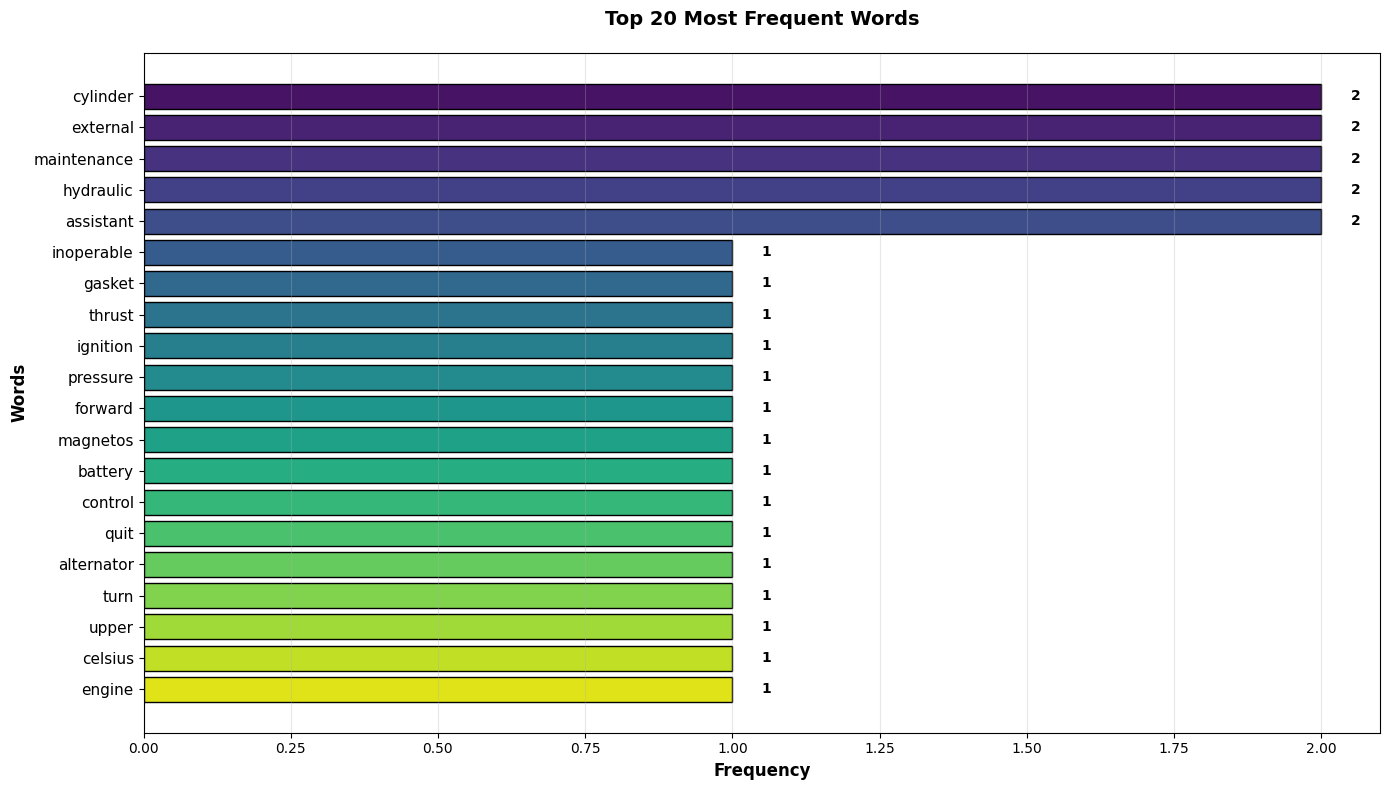

In [30]:
word_freq = vehicle_merged_df['word'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(14, 8))
colors = sns.color_palette("viridis", len(word_freq))
bars = ax.barh(range(len(word_freq)), word_freq.values, color=colors, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(word_freq)))
ax.set_yticklabels(word_freq.index, fontsize=11)
ax.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax.set_ylabel('Words', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Most Frequent Words', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, word_freq.values)):
    ax.text(val + 0.05, i, str(val), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

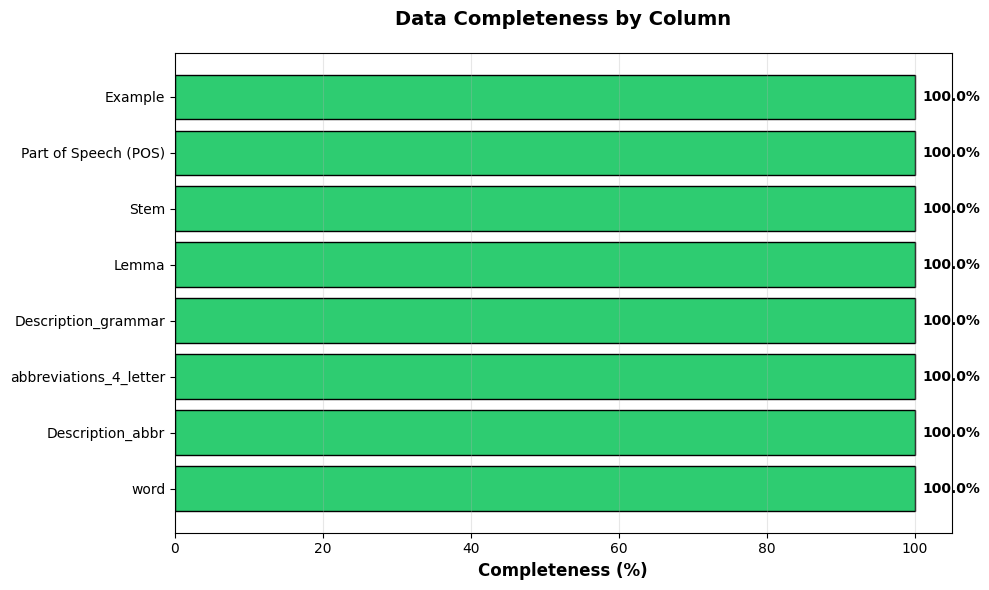

In [31]:
completeness = {}
for col in vehicle_merged_df.columns:
    non_null = vehicle_merged_df[col].notna().sum()
    completeness[col] = (non_null / len(vehicle_merged_df)) * 100

fig, ax = plt.subplots(figsize=(10, 6))
colors_comp = ['#2ecc71' if v == 100 else '#e74c3c' for v in completeness.values()]
bars = ax.barh(list(completeness.keys()), list(completeness.values()),
               color=colors_comp, edgecolor='black', linewidth=1)
ax.set_xlabel('Completeness (%)', fontsize=12, fontweight='bold')
ax.set_title('Data Completeness by Column', fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 105)
ax.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, completeness.values())):
    ax.text(val + 1, i, f'{val:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()